In [1]:
import requests
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas as pd
dir(alpha_vantage)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alphavantage',
 'timeseries']

In [2]:
def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    df.index = pd.to_datetime(df.index)
    df=pd.DataFrame(df['close'])
    return df

df=CryptoData('USDT_BTC', 86400)
df


,close
date,
2015-02-19,244.000000
2015-02-20,240.250000
2015-02-21,245.000000
2015-02-22,235.000000
2015-02-23,235.000000
2015-02-24,239.750000
2015-02-25,237.750000
2015-02-26,238.500000
2015-02-27,249.000000


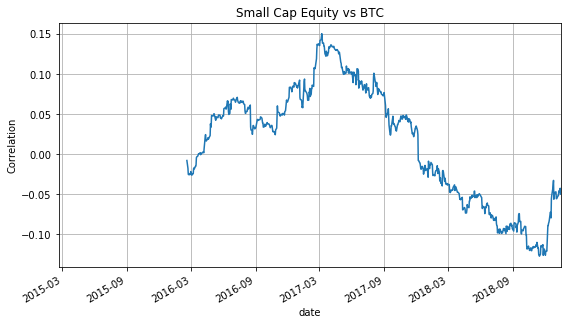

In [14]:
df2=df.join(df1,how='outer')
df2=df2.dropna()
df3=df2.pct_change()
df3=df3.dropna()
df3['close'].rolling(252).corr(df3.iloc[:,1]).plot(figsize=(9,5))


plt.ylabel('Correlation')
plt.title('Small Cap Equity vs BTC')
plt.grid(True)
plt.show()

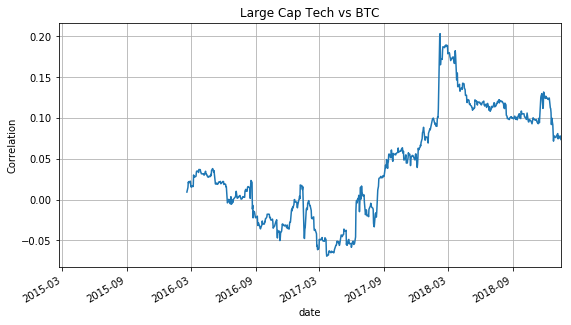

In [12]:
df2=df.join(df1,how='outer')
df2=df2.dropna()
df3=df2.pct_change()
df3=df3.dropna()
df3['close'].rolling(252).corr(df3.iloc[:,1]).plot(figsize=(9,5))


plt.ylabel('Correlation')
plt.title('Large Cap Tech vs BTC')
plt.grid(True)
plt.show()

In [53]:
df3

,close,4. close
date,,
2015-02-20,-1.536885e-02,0.006126
2015-02-23,-2.185224e-02,-0.000303
2015-02-24,2.021277e-02,0.002759
2015-02-25,-8.342023e-03,-0.000766
2015-02-26,3.154574e-03,-0.001476
2015-02-27,4.402516e-02,-0.002956
2015-03-02,8.032129e-02,0.006125
2015-03-03,-6.617100e-03,-0.004539
2015-03-04,4.782576e-02,-0.004389


In [4]:
df1

,4. close
date,
2000-07-28,75.53
2000-07-31,76.31
2000-08-01,75.56
2000-08-02,75.92
2000-08-03,75.03
2000-08-04,76.72
2000-08-07,78.20
2000-08-08,77.45
2000-08-09,77.27


In [13]:
def Stocks(ticker):
    ts = TimeSeries(key='Z7LCDQ8CWEM95QUB', output_format='pandas')
    df, meta_data = ts.get_daily(symbol=ticker, outputsize='full')
    df.index = pd.to_datetime(df.index)
    df=pd.DataFrame(df.iloc[:,3])
    return df
df1=Stocks('GLD')


In [2]:
class AlphaVantage:
    
    def __init__(self, symbol_code, interval="60min", outputsize="compact"):
        self.base_url = "https://www.alphavantage.co"
        self.default_endpoint = "/query"
        self.api_key = "Z7LCDQ8CWEM95QUB"
        self.symbol_code = symbol_code
        self.interval = interval
        self.outputsize = outputsize
        
    def intraday(self):
        parameters = {
            "function": "TIME_SERIES_INTRADAY",
            "symbol": self.symbol_code,
            "interval": self.interval,
            "outputsize": self.outputsize,
            "datatype": "json",
            "apikey": self.api_key
        }

        response_intraday = requests.get("{0}{1}".format(self.base_url, self.default_endpoint), params=parameters, stream=True).json()

        return response_intraday
    
    def daily(self):
        parameters = {
            "function": "TIME_SERIES_DAILY",
            "symbol": self.symbol_code,
            "outputsize": self.outputsize,
            "datatype": "json",
            "apikey": self.api_key
        }

        response_daily = requests.get("{0}{1}".format(self.base_url, self.default_endpoint), params=parameters, stream=True).json()

        return response_daily

In [3]:

from get_historical_data import AlphaVantage
import pandas as pd
import json


def get_main_data_frame(symbol):
    #
    # Get historical data as json
    #
    #AlphaVantage(symbol).daily()
    historical_daily_data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    
    list_keys = []
    list_historical_data__daily = []
    for key in historical_data_daily['Time Series (Daily)']:
        list_keys.append(key)

    for k in list_keys:
        #
        # Extract relevant data from original historical data response
        #
        data = historical_data_daily['Time Series (Daily)'][k]

        price_open = data['1. open']
        price_high = data['2. high']
        price_low = data['3. low']
        price_close = data['4. close']

        dict_data = dict([
            (u'date', k),
            (u'symbol', symbol),
            (u'price_open', price_open),
            (u'price_high', price_high),
            (u'price_low', price_low),
            (u'price_close', price_close),
        ])

        list_historical_data__daily.append(dict_data)
        
        # convert data to data frame
    #
    df = pd.read_json(json.dumps(list_historical_data__daily))

    #
    # prepare data, and add calculated fields to data frame
    #
    df['date_str'] = df['date']
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)

    df['price_close_lag'] = df['price_close'].shift(1)
    df['price_close_lead'] = df['price_close'].shift(-1)

    df.insert(0, 'date_id', range(1, 1 + len(df)))

    #
    # returns data frame
    # 
    return df


ModuleNotFoundError: No module named 'get_historical_data'

In [67]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import json
from pandas.io.json import json_normalize

def FX(symbol):
    style.use('fivethirtyeight')
    api_key="Z7LCDQ8CWEM95QUB"
    data_type="FX_DAILY"
    data=requests.get('https://www.alphavantage.co/query?function='+data_type+'&from_symbol='+symbol[:3]+'&to_symbol='+symbol[3:]+'&apikey={}'.format(api_key))
    data=data.json()
    data=data['Time Series FX (Daily)']
    df=pd.DataFrame(columns=['date','open','high','low','close'])
    for d,p in data.items():
        date=datetime.datetime.strptime(d,'%Y-%m-%d')
        data_row=[date,float(p['1. open']),float(p['2. high']),float(p['3. low']),float(p['4. close'])]
        df.loc[-1,:]=data_row
        df.index=df.index+1
    data=df.sort_values('date')
    data.index=df['date']
    data=data.drop(['date'],axis=1)
    return data


In [68]:
FX("EURUSD")

,open,high,low,close
date,,,,
2019-01-19,1.1749,1.1792,1.173,1.1766
2019-01-18,1.1766,1.1798,1.1725,1.1749
2019-01-17,1.1749,1.1757,1.1632,1.1635
2019-01-16,1.1634,1.1651,1.1569,1.16
2019-01-15,1.1607,1.1627,1.1601,1.1604
2019-01-14,1.1605,1.1625,1.1562,1.1575
2019-01-13,1.1576,1.158,1.1504,1.155
2019-01-11,1.1551,1.1594,1.1463,1.1484
2019-01-10,1.1484,1.1543,1.1462,1.1516


In [62]:
data

,open,high,low,close
date,,,,
2019-01-19,1.1749,1.1792,1.173,1.1766
2019-01-18,1.1766,1.1798,1.1725,1.1749
2019-01-17,1.1749,1.1757,1.1632,1.1635
2019-01-16,1.1634,1.1651,1.1569,1.16
2019-01-15,1.1607,1.1627,1.1601,1.1604
2019-01-14,1.1605,1.1625,1.1562,1.1575
2019-01-13,1.1576,1.158,1.1504,1.155
2019-01-11,1.1551,1.1594,1.1463,1.1484
2019-01-10,1.1484,1.1543,1.1462,1.1516
